In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing          
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Task 1

In [2]:
hr_df=pd.read_csv('DS2_C5_S3_HR_Data_Practice.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
hr_df.shape

(14999, 10)

In [6]:
hr_df.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [7]:
import tabulate
from tabulate import tabulate
cat=[]
con=[]
for i in hr_df.columns:
    if hr_df[i].nunique()>10:
        con.append(i)
    else:
        cat.append(i)
print(tabulate({"Categorical":cat,'Continuous':con},headers=['Categorical','Continuous']))              

Categorical            Continuous
---------------------  --------------------
number_project         satisfaction_level
time_spend_company     last_evaluation
Work_accident          average_montly_hours
left
promotion_last_5years
Department
salary


In [8]:
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
for i in hr_df.columns:
    print(i,':',hr_df[i].nunique())

satisfaction_level : 92
last_evaluation : 65
number_project : 6
average_montly_hours : 215
time_spend_company : 8
Work_accident : 2
left : 2
promotion_last_5years : 2
Department : 10
salary : 3


In [10]:
for i in hr_df.columns:
    if hr_df[i].nunique()<20:
        print(i,':',hr_df[i].unique())

number_project : [2 5 7 6 4 3]
time_spend_company : [ 3  6  4  5  2  8 10  7]
Work_accident : [0 1]
left : [1 0]
promotion_last_5years : [0 1]
Department : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary : ['low' 'medium' 'high']


<AxesSubplot:xlabel='salary', ylabel='count'>

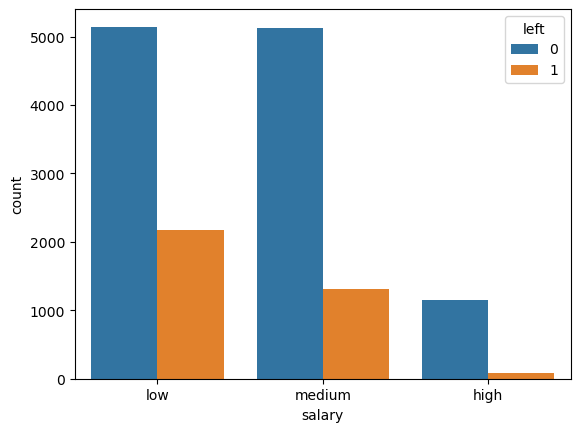

In [11]:
sns.countplot(data=hr_df,x=hr_df['salary'],hue='left')

# Employees with low salary left 

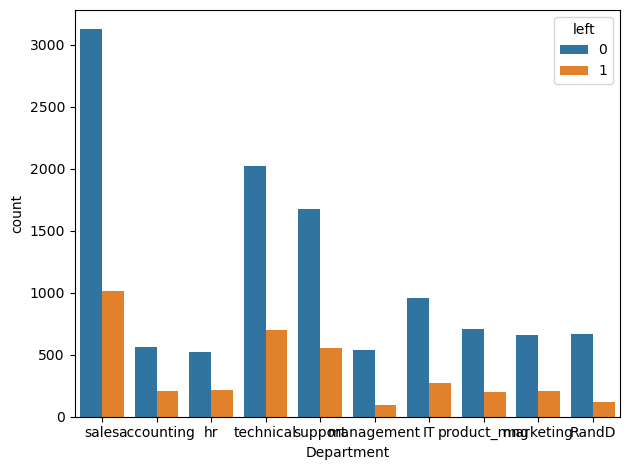

In [12]:
sns.countplot(data=hr_df,x=hr_df['Department'],hue='left')
plt.tight_layout()

In [13]:
hr_df.groupby(['Department'])['left'].value_counts()

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: left, dtype: int64

# Sales and HR department , the employees leave the most.

<AxesSubplot:xlabel='left', ylabel='count'>

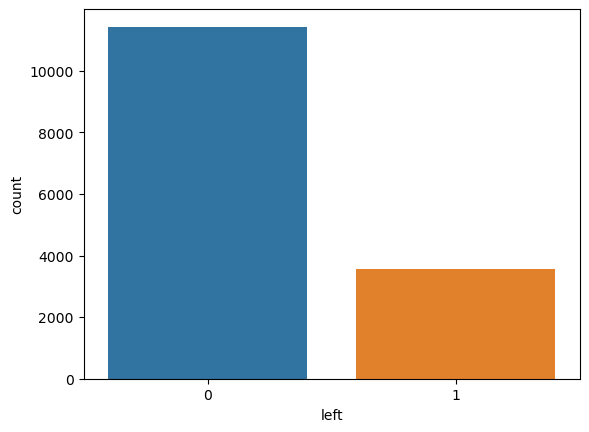

In [14]:
sns.countplot(data=hr_df,x=hr_df['left'])

# Task 2

In [15]:
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder=LabelEncoder()

In [18]:
df=hr_df.copy()
df['Department_new']=labelencoder.fit_transform(df['Department'])
df['Salary_new']=labelencoder.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_new,Salary_new
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


In [26]:
corr=df.corr()
#corr.background_gradient(cmap='magma')

C:\Users\Yogesh Yadav\AppData\Local\Temp\ipykernel_22228\3753404208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot:>

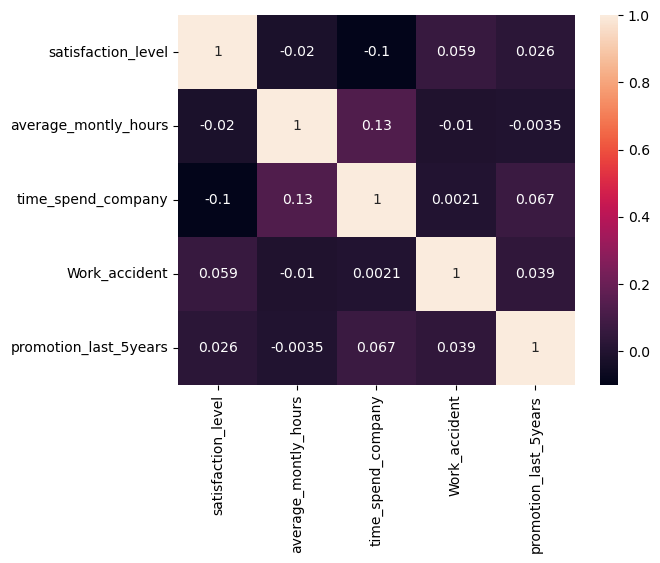

In [27]:
sns.heatmap(df[['satisfaction_level','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].corr(),annot=True)

# Task 3

In [28]:
x=df.drop(columns=['left','Department','salary'])
y=df['left']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

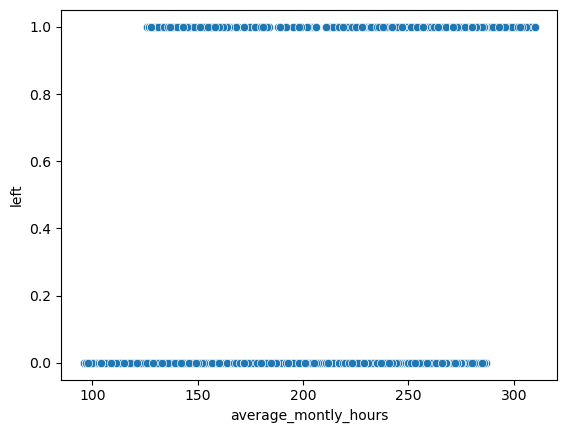

In [29]:
sns.scatterplot(x=df['average_montly_hours'],y=df['left'])
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [31]:
import warnings
warnings.filterwarnings('ignore')
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_predict=model.predict(x_test)

In [33]:
np.unique(y_predict)

array([0, 1], dtype=int64)

In [34]:
model.coef_[0]

array([-3.9383215 ,  0.36727237, -0.2753589 ,  0.00484734,  0.22575459,
       -1.52786146, -0.78831495,  0.05050526, -0.01429559])

In [35]:
model.intercept_

array([-0.10064389])

In [36]:
a=x.columns
a1=pd.DataFrame(a,columns=['Features'])
a1['Coefficient']=model.coef_[0]
a1.sort_values(by='Coefficient',ascending=False,ignore_index=True)

,Features,Coefficient
0,last_evaluation,0.367272
1,time_spend_company,0.225755
2,Department_new,0.050505
3,average_montly_hours,0.004847
4,Salary_new,-0.014296
5,number_project,-0.275359
6,promotion_last_5years,-0.788315
7,Work_accident,-1.527861
8,satisfaction_level,-3.938322


# Log OddS

In [37]:
a=x.columns
a1=pd.DataFrame(a,columns=['Features'])
a1['Coefficient']=np.exp(model.coef_[0])
a1.sort_values(by='Coefficient',ascending=False,ignore_index=True)

,Features,Coefficient
0,last_evaluation,1.443791
1,time_spend_company,1.253268
2,Department_new,1.051802
3,average_montly_hours,1.004859
4,Salary_new,0.985806
5,number_project,0.759300
6,promotion_last_5years,0.454610
7,Work_accident,0.216999
8,satisfaction_level,0.019481


# Accuracy

In [38]:
acc=round(model.score(x_train,y_train)*100,2)
acc

76.41

In [39]:
acc=round(model.score(x_test,y_test)*100,2)
acc

77.51

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7751111111111111

In [41]:
from collections import Counter
x=0,1
d=Counter(y_predict)
for i in x:
    print('{} has occurred {} times'.format(i,d[i]))

0 has occurred 3994 times
1 has occurred 506 times


# Task 4

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,y_predict)

array([[3213,  231],
       [ 781,  275]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3444
           1       0.54      0.26      0.35      1056

    accuracy                           0.78      4500
   macro avg       0.67      0.60      0.61      4500
weighted avg       0.74      0.78      0.74      4500



In [46]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


print('accuracy:',accuracy_score(y_test,y_predict))
print('recall:',recall_score(y_test,y_predict))
print('f1-score:',f1_score(y_test,y_predict))
print('precision:',precision_score(y_test,y_predict))

accuracy: 0.7751111111111111
recall: 0.2604166666666667
f1-score: 0.352112676056338
precision: 0.5434782608695652


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [48]:
roc_score=roc_auc_score(y_test,y_predict)
roc_score

0.5966717479674797

In [49]:
y_hat=model.predict_proba(x_test)
pos_pob=y_hat[:,1]
pos_pob

array([0.07007478, 0.06907775, 0.74004975, ..., 0.44599653, 0.09306819,
       0.10757646])

In [50]:
fpr,tpr,threshold=roc_curve(y_test,pos_pob)

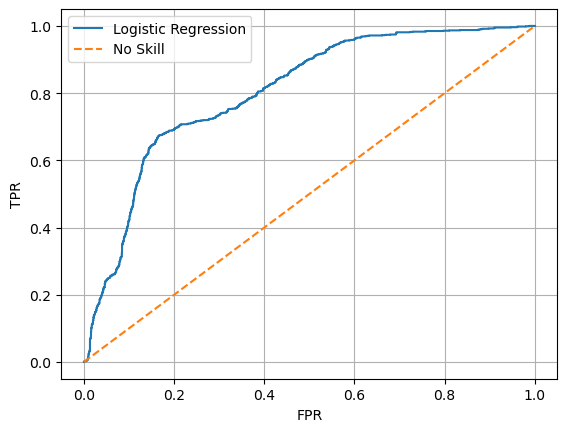

In [51]:
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
  
# Load the pickled model
modelc = pickle.loads(saved_model)
  


In [73]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_new,Salary_new
6493,0.77,0.57,5,162,3,0,0,5,0
3568,0.96,0.71,4,210,3,0,0,9,2
972,0.11,0.74,6,290,5,0,0,9,2
3260,0.58,0.76,3,220,3,0,0,8,2
671,0.11,0.94,6,264,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9743,0.50,0.48,2,106,2,0,0,8,0
5869,0.72,0.94,3,258,3,0,0,6,2
14232,0.38,0.55,2,147,3,0,0,7,1
7509,0.39,0.58,3,152,3,1,0,2,1


In [183]:
a=[0.77,0.57,5,162,3,0,0,5,0]

In [194]:
def classify(a):
    a=np.array(a).reshape(1,-1)
    model= pickle.loads(saved_model)
    return (np.unique(labelencoder.inverse_transform(y))[model.predict(a)])[0]

In [195]:
classify(a)

'high'

In [53]:
! pip install --quiet gradio

In [68]:
import gradio as gr

title = "Yogesh GPT"

def greet(name):
    return 'Hello'+' '+name

model=gr.Interface(fn=greet, 
    inputs='text',outputs='text')
model.launch(share=True);

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://795ff5cf51557a43be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [112]:
title = "Yogesh GPT"

def square(num):
    return num**2

input=gr.inputs.Number()
model=gr.Interface(fn=square, 
    inputs=input,outputs='number')
model.launch(share=True);

Running on local URL:  http://127.0.0.1:7869
Running on public URL: https://79a1599ba35d43f212.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
gr.inputs.

In [178]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_new,Salary_new
6493,0.77,0.57,5,162,3,0,0,5,0
3568,0.96,0.71,4,210,3,0,0,9,2
972,0.11,0.74,6,290,5,0,0,9,2
3260,0.58,0.76,3,220,3,0,0,8,2
671,0.11,0.94,6,264,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9743,0.50,0.48,2,106,2,0,0,8,0
5869,0.72,0.94,3,258,3,0,0,6,2
14232,0.38,0.55,2,147,3,0,0,7,1
7509,0.39,0.58,3,152,3,1,0,2,1


In [188]:
title = "Yogesh GPT"


model=gr.Interface(fn=classify, inputs=gr.inputs.Dataframe(col_count=9,headers=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department_new','Salary_new'],row_count=1),outputs=gr.outputs.Label(str))
model.launch(share=True);

Running on local URL:  http://127.0.0.1:7882
Running on public URL: https://bd734a753914862e52.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [134]:
gr.inputs.Dataframe()

[0.77, 0.57, 5, 162, 3, 0, 0, 5, 0]

In [189]:
import gradio as gr

def calculator(num1, operation, num2):
    if operation == "add":
        return num1 + num2
    elif operation == "subtract":
        return num1 - num2
    elif operation == "multiply":
        return num1 * num2
    elif operation == "divide":
        if num2 == 0:
            raise gr.Error("Cannot divide by zero!")
        return num1 / num2

demo = gr.Interface(
    calculator,
    [
        "number", 
        gr.Radio(["add", "subtract", "multiply", "divide"]),
        "number"
    ],
    "number",
    # examples=[
    #     [5, "add", 3],
    #     [4, "divide", 2],
    #     [-4, "multiply", 2.5],
    #     [0, "subtract", 1.2],
    # ],
    title="Toy Calculator",
    description="Here's a sample toy calculator. Allows you to calculate things like $2+2=4$",
)
demo.launch()

Running on local URL:  http://127.0.0.1:7883

To create a public link, set `share=True` in `launch()`.
